In [88]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
#data = pd.read_csv('C:/Users/RAMU GOPI/AA-Major Project/Data Generation/de_synthetic_data_df_cols_filteredV10.csv')
#data = pd.read_csv('C:/Users/RAMU GOPI/AA-Major Project/Data Generation/Crop_recommendation.csv')
data = pd.read_csv("D:/SEM/7th sem/major project/review-2.0/archive10MB/Crop_production.csv")
data.head(5)

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [94]:
data.columns

Index(['Unnamed: 0', 'State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH',
       'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [95]:
# columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph',
#        'rainfall', 'label']
columns = ['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Crop']
data = data[columns]
data

,State_Name,N,P,K,pH,rainfall,temperature,Crop
0,andhra pradesh,120,40,20,5.46,654.34,29.266667,cotton
1,andhra pradesh,20,60,20,6.18,654.34,29.266667,horsegram
2,andhra pradesh,80,40,40,5.42,654.34,29.266667,jowar
3,andhra pradesh,80,40,20,5.62,654.34,29.266667,maize
4,andhra pradesh,20,40,20,5.68,654.34,29.266667,moong
...,...,...,...,...,...,...,...,...
99844,west bengal,60,30,30,6.70,152.54,22.280000,wheat
99845,west bengal,80,40,20,5.68,182.50,29.200000,maize
99846,west bengal,80,40,40,5.64,182.50,29.200000,rice
99847,west bengal,80,40,40,5.42,152.54,22.280000,rice


In [96]:
print("shape of dataset: ",data.shape)

shape of dataset:  (99849, 8)


In [97]:
data['Crop'].unique()

array(['cotton', 'horsegram', 'jowar', 'maize', 'moong', 'ragi', 'rice',
       'sunflower', 'wheat', 'sesamum', 'soyabean', 'rapeseed', 'jute',
       'arecanut', 'onion', 'potato', 'sweetpotato', 'tapioca',
       'turmeric', 'barley', 'banana', 'coriander', 'garlic',
       'blackpepper', 'cardamom', 'cashewnuts', 'blackgram', 'coffee',
       'ladyfinger', 'brinjal', 'cucumber', 'grapes', 'mango', 'orange',
       'papaya', 'tomato', 'cabbage', 'bottlegourd', 'pineapple',
       'carrot', 'radish', 'bittergourd', 'drumstick', 'jackfruit',
       'cauliflower', 'watermelon', 'ashgourd', 'beetroot', 'pomegranate',
       'ridgegourd', 'pumpkin', 'apple', 'ginger'], dtype=object)

#                                                     Preprocessing

# label column values are in string format 

In [98]:
#doing one hot encoding 'label' column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Crop'] = encoder.fit_transform(data['Crop'])
encoder2 = LabelEncoder()
data['State_Name'] = encoder2.fit_transform(data['State_Name'])
data = data.sort_values(by = 'State_Name')
data

,State_Name,N,P,K,pH,rainfall,temperature,Crop
17726,0,100,40,140,5.86,1925.68,27.000000,1
31401,0,100,40,140,5.82,3322.06,27.036364,1
31400,0,80,40,40,5.42,1925.68,27.000000,42
31399,0,70,40,60,5.94,3322.06,27.036364,14
31398,0,100,60,50,5.14,3322.06,27.036364,8
...,...,...,...,...,...,...,...,...
39797,32,80,40,40,5.60,1166.94,28.333333,42
39798,32,80,40,40,5.54,1166.94,28.333333,27
39799,32,80,40,20,5.42,1166.94,28.333333,29
39791,32,80,40,40,5.40,182.50,29.200000,42


In [99]:
df = data#.sample(10000)

In [100]:
df

,State_Name,N,P,K,pH,rainfall,temperature,Crop
17726,0,100,40,140,5.86,1925.68,27.000000,1
31401,0,100,40,140,5.82,3322.06,27.036364,1
31400,0,80,40,40,5.42,1925.68,27.000000,42
31399,0,70,40,60,5.94,3322.06,27.036364,14
31398,0,100,60,50,5.14,3322.06,27.036364,8
...,...,...,...,...,...,...,...,...
39797,32,80,40,40,5.60,1166.94,28.333333,42
39798,32,80,40,40,5.54,1166.94,28.333333,27
39799,32,80,40,20,5.42,1166.94,28.333333,29
39791,32,80,40,40,5.40,182.50,29.200000,42


In [101]:
len(list(sorted(df['Crop'].unique())))

53

In [102]:
assign_crop = [(y,x) for x,y in zip(encoder.inverse_transform(range(53)),range(53))]
print(assign_crop)
assign_state = [(y,x) for x,y in zip(encoder2.inverse_transform(range(33)),range(33))]
print(assign_state)

[(0, 'apple'), (1, 'arecanut'), (2, 'ashgourd'), (3, 'banana'), (4, 'barley'), (5, 'beetroot'), (6, 'bittergourd'), (7, 'blackgram'), (8, 'blackpepper'), (9, 'bottlegourd'), (10, 'brinjal'), (11, 'cabbage'), (12, 'cardamom'), (13, 'carrot'), (14, 'cashewnuts'), (15, 'cauliflower'), (16, 'coffee'), (17, 'coriander'), (18, 'cotton'), (19, 'cucumber'), (20, 'drumstick'), (21, 'garlic'), (22, 'ginger'), (23, 'grapes'), (24, 'horsegram'), (25, 'jackfruit'), (26, 'jowar'), (27, 'jute'), (28, 'ladyfinger'), (29, 'maize'), (30, 'mango'), (31, 'moong'), (32, 'onion'), (33, 'orange'), (34, 'papaya'), (35, 'pineapple'), (36, 'pomegranate'), (37, 'potato'), (38, 'pumpkin'), (39, 'radish'), (40, 'ragi'), (41, 'rapeseed'), (42, 'rice'), (43, 'ridgegourd'), (44, 'sesamum'), (45, 'soyabean'), (46, 'sunflower'), (47, 'sweetpotato'), (48, 'tapioca'), (49, 'tomato'), (50, 'turmeric'), (51, 'watermelon'), (52, 'wheat')]
[(0, 'andaman and nicobar islands'), (1, 'andhra pradesh'), (2, 'arunachal pradesh'), 

In [103]:
di = dict(zip(encoder2.classes_,encoder2.transform(encoder2.classes_)))


## Splitting the data into Train and Test 

In [104]:
X = df.drop('Crop',axis = 1)
Y = df['Crop']

In [105]:
print("x: ",X.columns)

x:  Index(['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature'], dtype='object')


In [106]:
X

,State_Name,N,P,K,pH,rainfall,temperature
17726,0,100,40,140,5.86,1925.68,27.000000
31401,0,100,40,140,5.82,3322.06,27.036364
31400,0,80,40,40,5.42,1925.68,27.000000
31399,0,70,40,60,5.94,3322.06,27.036364
31398,0,100,60,50,5.14,3322.06,27.036364
...,...,...,...,...,...,...,...
39797,32,80,40,40,5.60,1166.94,28.333333
39798,32,80,40,40,5.54,1166.94,28.333333
39799,32,80,40,20,5.42,1166.94,28.333333
39791,32,80,40,40,5.40,182.50,29.200000


In [107]:
Y

17726     1
31401     1
31400    42
31399    14
31398     8
         ..
39797    42
39798    27
39799    29
39791    42
99848    44
Name: Crop, Length: 99849, dtype: int32

In [108]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size = 0.8,random_state = 42)

In [109]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [110]:
import joblib
joblib.dump(scaler,'ml_saved_models/scalerV1.0.pkl')

['ml_saved_models/scalerV1.0.pkl']

In [16]:
print("x_train size :",x_train.size)
print("x_test size :",x_test.size)

x_train size : 559153
x_test size : 139790


In [ ]:
x_train


# building the models

In [42]:
models = [('LogisticRegression',LogisticRegression(max_iter = 1000)),
          ('SVM',SVC()),
          ('DecisionTreeClassifier',DecisionTreeClassifier()),
          ('KNeighborsClassifier',KNeighborsClassifier()),
          ('GaussianNB',GaussianNB()),
          ('RandomForestClassifier',RandomForestClassifier()),      #ensemble ML models 
          ('VotingClassifier',VotingClassifier([('Random Forest',RandomForestClassifier()),('Gradient Boosting',GradientBoostingClassifier()),('SVM',SVC()),('Logistic Regression',LogisticRegression(max_iter = 1000))])),
          ('BaggingClassifier',BaggingClassifier()),
          ('AdaBoostClassifier',AdaBoostClassifier()),
          ('GradientBoostingClassifier',GradientBoostingClassifier())
         ]

# model training

In [43]:
accuracies = {}
for name,model in models:
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    accuracies[name] = accuracy_score(y_test,predict)
    print(f'accuracy scores of {name} : {accuracies[name]}')

accuracy scores of LogisticRegression : 0.9310465698547822
accuracy scores of SVM : 0.9348022033049574
accuracy scores of DecisionTreeClassifier : 0.9412618928392589
accuracy scores of KNeighborsClasscifier : 0.9385077616424637
accuracy scores of GaussianNB : 0.9339008512769154
accuracy scores of RandomForestClassifier : 0.941662493740611
accuracy scores of VotingClassifier : 0.942113169754632
accuracy scores of BaggingClassifier : 0.9414121181772659
accuracy scores of AdaBoostClassifier : 0.29083625438157235
accuracy scores of GradientBoostingClassifier : 0.9438657986980471


In [44]:
import joblib
import os
import shutil
# shutil.rmtree('ml_saved_models')
# os.mkdir('ml_saved_models')
os.mkdir('ml_saved_models/normalV2.2')
for name,model in models:
    joblib.dump(model,f'ml_saved_models/normalV2.2/{name}_22.pkl')

# load the saved models

In [ ]:
# models1 = []
# for name,model in models:
#     model = joblib.load(f'ml_saved_models/normalV2.2/{name}_22.pkl')
#     models1.append((name,model))

In [45]:
accuracies1 = {}
for name,model in models:
    model = joblib.load(f'ml_saved_models/normalV2.2/{name}_22.pkl')
    predict = model.predict(x_test)
    accuracies1[name] = accuracy_score(y_test,predict)
    print(f'accuracy scores of {name} : {accuracies1[name]}')

accuracy scores of LogisticRegression : 0.9310465698547822
accuracy scores of SVM : 0.9348022033049574
accuracy scores of DecisionTreeClassifier : 0.9412618928392589
accuracy scores of KNeighborsClasscifier : 0.9385077616424637
accuracy scores of GaussianNB : 0.9339008512769154
accuracy scores of RandomForestClassifier : 0.941662493740611
accuracy scores of VotingClassifier : 0.942113169754632
accuracy scores of BaggingClassifier : 0.9414121181772659
accuracy scores of AdaBoostClassifier : 0.29083625438157235
accuracy scores of GradientBoostingClassifier : 0.9438657986980471


In [46]:
ml_accuracies = pd.DataFrame()
ml_accuracies['model'] = list(accuracies.keys())
ml_accuracies['accuracies'] = list(accuracies.values())
ml_accuracies.to_csv('ml_saved_models/normalV2.2/ml_accuracies_normalV22.csv')
ml_accuracies

,model,accuracies
0,LogisticRegression,0.931047
1,SVM,0.934802
2,DecisionTreeClassifier,0.941262
3,KNeighborsClasscifier,0.938508
4,GaussianNB,0.933901
5,RandomForestClassifier,0.941662
6,VotingClassifier,0.942113
7,BaggingClassifier,0.941412
8,AdaBoostClassifier,0.290836
9,GradientBoostingClassifier,0.943866


In [47]:
sho = pd.DataFrame(list(y_test),columns=['y_test'])
sho['predict'] = predict
sho

,y_test,predict
0,52,52
1,42,42
2,52,52
3,45,45
4,50,50
...,...,...
19965,37,37
19966,46,46
19967,44,44
19968,29,29


# hyper parametertuning

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
import os
import shutil

# Define hyperparameters for each model for grid search
param_grid = {
    'LogisticRegression': {'max_iter': [1000]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10, 15]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'GaussianNB': {},  # No hyperparameters for GaussianNB
    'RandomForestClassifier': {'n_estimators': [50, 100, 200]},
    'VotingClassifier': {},  # Hyperparameters are set inside VotingClassifier definition
    'BaggingClassifier': {'n_estimators': [10, 50, 100]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
}

# List of models with their respective names
models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVM', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('VotingClassifier', VotingClassifier([('Random Forest', RandomForestClassifier()),
                                           ('SVM', SVC()),
                                           ('Logistic Regression', LogisticRegression(max_iter=1000))])),
    ('BaggingClassifier', BaggingClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier())
]

In [27]:
# shutil.rmtree('ml_saved_models')
# os.mkdir('ml_saved_models')
#os.mkdir('ml_saved_models/hyper')
hyper_accuracies = {}
# Loop through each model and perform hyperparameter tuning
for name, model in models:    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid.get(name, {}), cv=3, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Fit the best model on the entire training data
    best_model.fit(x_train, y_train)
    
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    hyper_accuracies[name] = accuracy
    best_params[name] = grid_search.best_params_
    # Print the best hyperparameters and performance metrics
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Validation accuracy for {name}: {accuracy}")
    joblib.dump(best_model,f'ml_saved_models/hyper/{name}_hyper_22.pkl')

Best hyperparameters for LogisticRegression: {'max_iter': 1000}
Validation accuracy for LogisticRegression: 0.9310465698547822
Best hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}
Validation accuracy for SVM: 0.94271407110666
Best hyperparameters for DecisionTreeClassifier: {'max_depth': 15}
Validation accuracy for DecisionTreeClassifier: 0.9406109163745618
Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 5}
Validation accuracy for KNeighborsClassifier: 0.9385077616424637
Best hyperparameters for GaussianNB: {}
Validation accuracy for GaussianNB: 0.9339008512769154
Best hyperparameters for RandomForestClassifier: {'n_estimators': 50}
Validation accuracy for RandomForestClassifier: 0.9407110665998999
Best hyperparameters for VotingClassifier: {}
Validation accuracy for VotingClassifier: 0.9348022033049574
Best hyperparameters for BaggingClassifier: {'n_estimators': 100}
Validation accuracy for BaggingClassifier: 0.9408612919379069
Best hyperparameters for AdaBoostClass

In [28]:
hyper_accuracies = {}
for name,model in models:
    model1 = joblib.load(f'ml_saved_models/hyper/{name}_hyper_22.pkl')
    predict = model1.predict(x_test)
    hyper_accuracies[name] = accuracy_score(y_test,predict)
    print(f'accuracy scores of {name} : {hyper_accuracies[name]}')

accuracy scores of LogisticRegression : 0.9310465698547822
accuracy scores of SVM : 0.94271407110666
accuracy scores of DecisionTreeClassifier : 0.9406109163745618
accuracy scores of KNeighborsClassifier : 0.9385077616424637
accuracy scores of GaussianNB : 0.9339008512769154
accuracy scores of RandomForestClassifier : 0.9407110665998999
accuracy scores of VotingClassifier : 0.9348022033049574
accuracy scores of BaggingClassifier : 0.9408612919379069
accuracy scores of AdaBoostClassifier : 0.9317476214321482
accuracy scores of GradientBoostingClassifier : 0.943314972458688


In [29]:
ml_hyper_accuracies = pd.DataFrame()
ml_hyper_accuracies['model'] = list(hyper_accuracies.keys())
ml_hyper_accuracies['hyper_accuracies'] = list(hyper_accuracies.values())
ml_hyper_accuracies.to_csv('ml_saved_models/hyper/ml_Hyper_accuraciesV22.csv')
ml_hyper_accuracies

,model,hyper_accuracies
0,LogisticRegression,0.931047
1,SVM,0.942714
2,DecisionTreeClassifier,0.940611
3,KNeighborsClassifier,0.938508
4,GaussianNB,0.933901
5,RandomForestClassifier,0.940711
6,VotingClassifier,0.934802
7,BaggingClassifier,0.940861
8,AdaBoostClassifier,0.931748
9,GradientBoostingClassifier,0.943315


In [41]:
ml_hyper_accuracies = ml_hyper_accuracies.sort_values(by = 'hyper_accuracies',ascending = False)
ml_hyper_accuracies.head(2)

,model,hyper_accuracies
9,GradientBoostingClassifier,0.943315
1,SVM,0.942714


In [ ]:
ml_best_params = pd.DataFrame()
ml_best_params['model'] = list(best_params.keys())
ml_best_params['best_params'] = list(best_params.values())
ml_best_params.to_csv('ml_saved_models/hyper/ml_best_paramsV22.csv')
ml_best_params

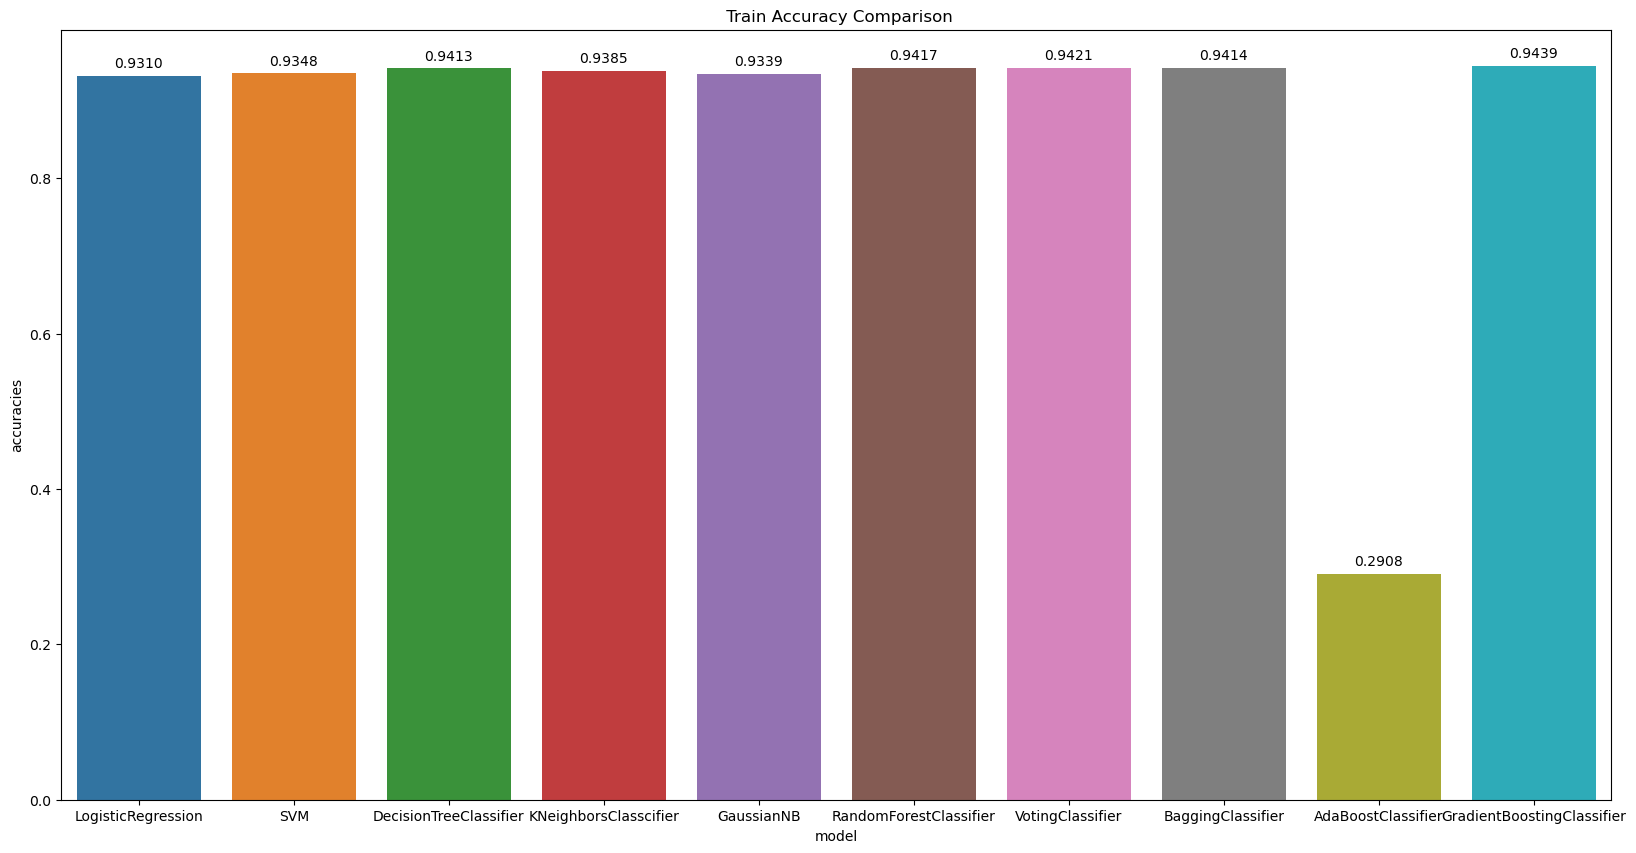

In [48]:
acc_data = pd.read_csv("ml_saved_models/normalV2.2/ml_accuracies_normalV22.csv") 
acc_data = acc_data[['model','accuracies']]
plt.figure(figsize=[20,10],dpi = 100)
plt.title(' Train Accuracy Comparison')
plt.xlabel('Train Accuracy')
plt.ylabel('Algorithm')
splot=sns.barplot(x=acc_data['model'],y=acc_data['accuracies'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

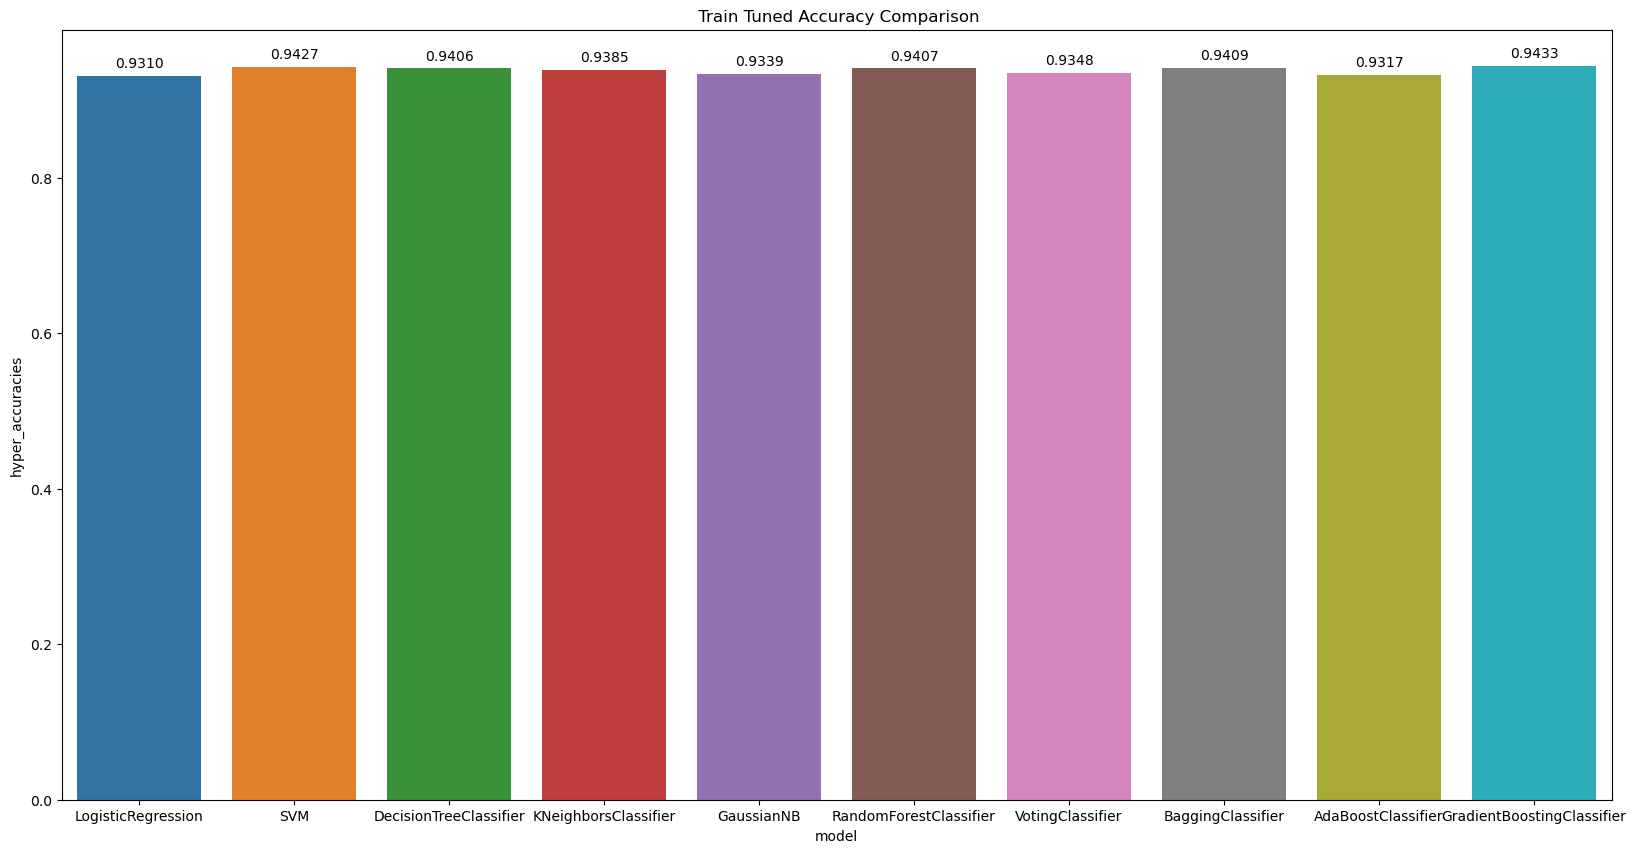

In [30]:
acc_data = pd.read_csv("ml_saved_models/hyper/ml_Hyper_accuraciesV22.csv") 
acc_data = acc_data[['model','hyper_accuracies']]
plt.figure(figsize=[20,10],dpi = 100)
plt.title(' Train Tuned Accuracy Comparison')
plt.xlabel('Train Tuned Accuracy')
plt.ylabel('Algorithm')
splot=sns.barplot(x=acc_data['model'],y=acc_data['hyper_accuracies'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [52]:
models

[('LogisticRegression', LogisticRegression(max_iter=1000)),
 ('SVM', SVC()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('KNeighborsClasscifier', KNeighborsClassifier()),
 ('GaussianNB', GaussianNB()),
 ('RandomForestClassifier', RandomForestClassifier()),
 ('VotingClassifier',
  VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                               ('Gradient Boosting',
                                GradientBoostingClassifier()),
                               ('SVM', SVC()),
                               ('Logistic Regression',
                                LogisticRegression(max_iter=1000))])),
 ('BaggingClassifier', BaggingClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier())]

In [56]:
encoder.classes_

array(['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot',
       'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
       'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber',
       'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram',
       'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango',
       'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate',
       'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice',
       'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato',
       'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat'],
      dtype=object)

In [57]:
encoder2.classes_

array(['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal'],
      dtype=object)

In [58]:
df.columns

Index(['State_Name', 'N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Crop'], dtype='object')

In [79]:
encoder2.classes_

array(['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal'],
      dtype=object)

In [84]:
X.head(1)

,State_Name,N,P,K,pH,rainfall,temperature
17726,0,100,40,140,5.86,1925.68,27.0


In [7]:
import joblib,shutil,os
from sklearn.preprocessing import StandardScaler
crops = ['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot',
       'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
       'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber',
       'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram',
       'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango',
       'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate',
       'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice',
       'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato',
       'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']
states = ['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
new_scaler = joblib.load('ml_saved_models/scalerV1.0.pkl')
def prediction(model_name,new_data):
    #temp = #extract temperature from state
    new_data[0] = states.index(new_data[0])
    new_data = new_scaler.transform([new_data])
    new_data = new_data
    model = joblib.load(f'ml_saved_models/normalV2.2/{model_name}_22.pkl')
    crop = crops[model.predict(new_data)[0]]
    return crop
list_of_crops = []
for name, model in models:
    crop = prediction(name,['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0])
    list_of_crops.append(crop)
    print(name," : ",crop)

C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

LogisticRegression  :  arecanut
SVM  :  arecanut
DecisionTreeClassifier  :  arecanut
KNeighborsClassifier  :  arecanut
GaussianNB  :  arecanut
RandomForestClassifier  :  arecanut


C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


VotingClassifier  :  arecanut
BaggingClassifier  :  arecanut
AdaBoostClassifier  :  rice


C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAMU GOPI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


GradientBoostingClassifier  :  arecanut


In [133]:
def prediction(model_name,new_data):
    #temp = #extract temperature from state
    new_data[0] = states.index(new_data[0])
    new_scaler = joblib.load('ml_saved_models/scalerV1.0.pkl')
    new_data = new_scaler.transform([new_data])
    new_data = new_data
    model = joblib.load(f'ml_saved_models/hyper/{model_name}_hyper_22.pkl')
    crop = crops[model.predict(new_data)[0]]
    return crop
for name, model in models:
    crop = prediction(name,['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0])
    print(name," : ",crop)

LogisticRegression  :  arecanut
SVM  :  arecanut
DecisionTreeClassifier  :  arecanut
KNeighborsClassifier  :  arecanut
GaussianNB  :  arecanut
RandomForestClassifier  :  arecanut
VotingClassifier  :  arecanut
BaggingClassifier  :  arecanut
AdaBoostClassifier  :  arecanut
GradientBoostingClassifier  :  arecanut


In [ ]:
# import joblib,shutil,os
# from sklearn.preprocessing import StandardScaler
# crops = ['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot',
#        'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
#        'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
#        'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber',
#        'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram',
#        'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango',
#        'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate',
#        'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice',
#        'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato',
#        'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']
# states = ['andaman and nicobar islands', 'andhra pradesh',
#        'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
#        'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
#        'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
#        'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
#        'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
#        'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
#        'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
# new_scaler = joblib.load('ml_saved_models/scalerV1.0.pkl')
# def prediction(model_name,new_data):
#     #temp = #extract temperature from state
#     new_data[0] = states.index(new_data[0])
#     new_data = new_scaler.transform([new_data])
#     new_data = new_data
#     model = joblib.load(f'ml_saved_models/normalV2.2/{model_name}_22.pkl')
#     crop = crops[model.predict(new_data)[0]]
#     return crop
# list_of_crops = []
# for name, model in models:
#     crop = prediction(name,['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0])
#     list_of_crops.append(crop)
#     print(name," : ",crop)

In [30]:
# List to store models supporting predict_proba
models_with_proba = []

# Check and add models supporting predict_proba to the list
for name, model in models:
    if hasattr(model, 'predict_proba'):
        models_with_proba.append((name, model))

# Access models_with_proba for further use
print(models_with_proba)

[('LogisticRegression', LogisticRegression()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('KNeighborsClassifier', KNeighborsClassifier()), ('GaussianNB', GaussianNB()), ('RandomForestClassifier', RandomForestClassifier()), ('BaggingClassifier', BaggingClassifier()), ('AdaBoostClassifier', AdaBoostClassifier()), ('GradientBoostingClassifier', GradientBoostingClassifier())]


In [156]:
import joblib,shutil,os
from sklearn.preprocessing import StandardScaler

crops = ['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot',
       'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
       'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber',
       'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram',
       'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango',
       'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate',
       'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice',
       'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato',
       'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']
states = ['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
new_scaler = joblib.load('ml_saved_models/scalerV1.0.pkl')
# Create a dictionary to store the total probabilities for each crop
crop_probabilities = {crop: 0.0 for crop in crops}
def ml_predict(new_data):
    #new_data[0]  =states.index(list(new_data)[0])
    new_data[0] = states.index(new_data[0])
    new_data = new_scaler.transform([new_data])
    new_data = new_data
    # Loop through each model and accumulate prediction probabilities
    for name, model_ in models_with_proba:
        #new_data = ['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0]
        model = joblib.load(f'ml_saved_models/hyper/{name}_hyper_22.pkl')
        probabilities = model.predict_proba(new_data)[0]
        for idx, prob in enumerate(probabilities):
            crop_probabilities[crops[idx]] += prob
    # Calculate the average probabilities
    total_models = len(models_with_proba)
    average_probabilities = {crop: prob / total_models for crop, prob in crop_probabilities.items()}
    # Find the crop with the highest average probability
    most_probable_crop = max(average_probabilities, key=average_probabilities.get)
    print("Most Probable Crop:", most_probable_crop)
    print("accuracy : ", max(average_probabilities.values()))
#     print("top 5 crops: ",average_probabilities)
#     Sort crops by their average probabilities in descending order
#     sorted_crops = sorted(average_probabilities, key=average_probabilities.get, reverse=True)
#     # Print the top 5 crops
#     print("Top 5 Crops:")
#     for i, crop in enumerate(sorted_crops[:5], 1):
#         print(f"{i}. {crop} - Probability: {average_probabilities[crop]*100}")

In [157]:
new_data = ["jammu and kashmir",80,40,40,5.38,516.68,27.866667]
#states.index(new_data[0])
ml_predict(new_data)

Most Probable Crop: rice
accuracy :  0.7770912981019891


In [158]:

new_data = ["jammu and kashmir",60,30,30,6.11,293.36,14.700000]
#states.index(new_data[0])
ml_predict(new_data)

Most Probable Crop: wheat
accuracy :  0.9757918460969002


In [159]:
new_data = ["assam",120,60,65,6.12,2169.32,23.736364]
#states.index(new_data[0])
ml_predict(new_data)

Most Probable Crop: wheat
accuracy :  0.9757923879394012


In [152]:
import joblib,shutil,os
from sklearn.preprocessing import StandardScaler

crops = ['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot',
       'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd',
       'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts',
       'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber',
       'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram',
       'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango',
       'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate',
       'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice',
       'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato',
       'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']
states = ['andaman and nicobar islands', 'andhra pradesh',
       'arunachal pradesh', 'assam', 'bihar', 'chandigarh',
       'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat',
       'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand',
       'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur',
       'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry',
       'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
       'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
new_scaler = joblib.load('ml_saved_models/scalerV1.0.pkl')
# Create a dictionary to store the total probabilities for each crop
crop_probabilities = {crop: 0.0 for crop in crops}
def ml_predict(new_data):
    #new_data[0]  =states.index(list(new_data)[0])
    new_data[0] = states.index(new_data[0])
    new_data = new_scaler.transform([new_data])
    new_data = new_data
    # Loop through each model and accumulate prediction probabilities
    for name, model_ in models_with_proba:
        #new_data = ['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0]
        model = joblib.load(f'ml_saved_models/hyper/{name}_hyper_22.pkl')
        probabilities = model.predict_proba(new_data)[0]
        for idx, prob in enumerate(probabilities):
            crop_probabilities[crops[idx]] += prob
    # Calculate the average probabilities
    total_models = len(models_with_proba)
    average_probabilities = {crop: prob / total_models for crop, prob in crop_probabilities.items()}

    # ... (previous code remains the same)

    # Calculate the total sum of probabilities
    total_sum = sum(average_probabilities.values())

    # Normalize the probabilities to ensure they sum up to 1
    normalized_probabilities = {crop: prob / total_sum for crop, prob in average_probabilities.items()}

    # Find the crop with the highest normalized probability
    most_probable_crop = max(normalized_probabilities, key=normalized_probabilities.get)
    print("Most Probable Crop:", most_probable_crop)

    # Sort crops by their normalized probabilities in descending order
    sorted_crops = sorted(normalized_probabilities, key=normalized_probabilities.get, reverse=True)

    # Print the top 5 crops
    print("Top 5 Crops:")
    for i, crop in enumerate(sorted_crops[:5], 1):
        print(f"{i}. {crop} - Probability: {normalized_probabilities[crop]*100}")


In [150]:
new_data = ["assam",120,60,65,6.12,2169.32,23.736364]
#states.index(new_data[0])
ml_predict(new_data)

Most Probable Crop: onion
Top 5 Crops:
1. onion - Probability: 89.74243443419871
2. cabbage - Probability: 2.1045157494974753
3. pineapple - Probability: 1.4394212770760477
4. tomato - Probability: 1.4171270261571234
5. beetroot - Probability: 1.1275906755351055


In [155]:
new_data = ['andaman and nicobar islands',100,40,140,5.86,1925.68,27.0]
#states.index(new_data[0])
ml_predict(new_data)

Most Probable Crop: arecanut
Top 5 Crops:
1. arecanut - Probability: 90.113729033329
2. tomato - Probability: 2.535803811039332
3. pineapple - Probability: 1.7745960131489804
4. cabbage - Probability: 1.3241351713465364
5. onion - Probability: 1.1608852394740052
